In [1]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import datetime
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
data=pd.read_csv('D:/thesis/USA_traffic_accident/USA-MapQuest-census-streettype.csv',
                usecols=['Severity', 'Start_Lat', 'Start_Lng','Side', 
                         'Timezone','Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 
                         'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 
                         'Give_Way','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop','Traffic_Calming', 
                         'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight', 
                         'Duration', 'Clear','Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 
                         'Month','Weekday', 'Day', 'Hour', 'Minute', 'Precipitation_NA', 'Severity4',
    'Population_County', 'Drive_County', 'Transit_County', 'Walk_County','MedianHouseholdIncome_County', 
                         'Rd', 'St', 'Dr', 'Ave', 'Blvd', 'Ln', 'Pkwy', 'Hwy', 'Way', 'Ct', 'Pl', 'US-', 'Creek','Cir', 'Hill', 'Route', 'I-', 'Trl', 'Valley', 'Ridge', 'Pike', 'Fwy','River']
                )

In [3]:
data=data.drop(['Duration','Minute'],axis=1)

In [4]:
pd.set_option('display.max_columns', 1000)
data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,2,41.848064,-71.062386,R,US/Eastern,36.0,59.0,30.20,10.00,W,3.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,9,0,0,558905.0,81.4,2.7,2.7,66157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,42.660690,-71.192589,R,US/Eastern,36.0,55.0,30.04,10.00,CALM,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,12,0,0,781024.0,74.0,5.9,3.3,75878.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,42.157021,-71.069061,R,US/Eastern,31.0,72.0,30.16,10.00,CALM,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,0,698249.0,67.9,14.4,3.7,99511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,42.338776,-71.276962,R,US/Eastern,26.0,81.0,30.04,10.00,CALM,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,Night,Night,Night,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,0,1595192.0,67.4,12.4,5.0,97012.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3,42.379570,-83.200256,R,US/Eastern,32.0,100.0,29.37,0.25,S,5.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,2,359,7,0,0,1761382.0,80.6,2.8,2.0,45321.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546595,3,30.443359,-91.178421,R,US/Central,70.0,76.0,30.08,7.00,N,4.6,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,11,1,0,444094.0,83.2,1.4,2.0,52719.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546596,2,29.868111,-90.088600,R,US/Pacific,73.0,87.0,30.08,4.00,N,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,7,0,0,435300.0,81.6,1.1,1.6,52558.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
546597,3,30.008213,-90.257507,R,US/Central,70.0,87.0,30.11,4.00,N,6.9,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,0,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546598,3,30.009644,-90.237511,R,US/Central,70.0,87.0,30.11,4.00,N,6.9,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,0,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
data = data.replace([True, False], [1,0])
data = data.replace(['Day','Night'],[1,0])

In [6]:
data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,2,41.848064,-71.062386,R,US/Eastern,36.0,59.0,30.20,10.00,W,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,9,0,0,558905.0,81.4,2.7,2.7,66157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,42.660690,-71.192589,R,US/Eastern,36.0,55.0,30.04,10.00,CALM,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,12,0,0,781024.0,74.0,5.9,3.3,75878.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,42.157021,-71.069061,R,US/Eastern,31.0,72.0,30.16,10.00,CALM,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,0,698249.0,67.9,14.4,3.7,99511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,42.338776,-71.276962,R,US/Eastern,26.0,81.0,30.04,10.00,CALM,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,0,1595192.0,67.4,12.4,5.0,97012.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3,42.379570,-83.200256,R,US/Eastern,32.0,100.0,29.37,0.25,S,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,2,359,7,0,0,1761382.0,80.6,2.8,2.0,45321.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546595,3,30.443359,-91.178421,R,US/Central,70.0,76.0,30.08,7.00,N,4.6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,11,1,0,444094.0,83.2,1.4,2.0,52719.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546596,2,29.868111,-90.088600,R,US/Pacific,73.0,87.0,30.08,4.00,N,6.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,7,0,0,435300.0,81.6,1.1,1.6,52558.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
546597,3,30.008213,-90.257507,R,US/Central,70.0,87.0,30.11,4.00,N,6.9,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,0,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546598,3,30.009644,-90.237511,R,US/Central,70.0,87.0,30.11,4.00,N,6.9,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,0,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
# dataset为数据集  product_tags为需要编码的特征列(假设为第一列)
product_tags = ['Side','Timezone','Wind_Direction']
from sklearn.preprocessing import LabelEncoder
for col in product_tags:
    le = LabelEncoder()
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [8]:
data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,2,41.848064,-71.062386,1,1,36.0,59.0,30.20,10.00,9,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,9,0,0,558905.0,81.4,2.7,2.7,66157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,42.660690,-71.192589,1,1,36.0,55.0,30.04,10.00,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,12,0,0,781024.0,74.0,5.9,3.3,75878.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,42.157021,-71.069061,1,1,31.0,72.0,30.16,10.00,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,0,698249.0,67.9,14.4,3.7,99511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,42.338776,-71.276962,1,1,26.0,81.0,30.04,10.00,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,0,1595192.0,67.4,12.4,5.0,97012.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3,42.379570,-83.200256,1,1,32.0,100.0,29.37,0.25,5,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,2,359,7,0,0,1761382.0,80.6,2.8,2.0,45321.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546595,3,30.443359,-91.178421,1,0,70.0,76.0,30.08,7.00,2,4.6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,11,1,0,444094.0,83.2,1.4,2.0,52719.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546596,2,29.868111,-90.088600,1,3,73.0,87.0,30.08,4.00,2,6.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,7,0,0,435300.0,81.6,1.1,1.6,52558.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
546597,3,30.008213,-90.257507,1,0,70.0,87.0,30.11,4.00,2,6.9,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,0,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546598,3,30.009644,-90.237511,1,0,70.0,87.0,30.11,4.00,2,6.9,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,0,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
le.classes_  # 查看有哪些标签

array(['CALM', 'E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'VAR', 'W'],
      dtype=object)

In [10]:
X=data.drop(['Severity4','Severity'],axis=1)
y=data.Severity4

In [11]:
X

,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,41.848064,-71.062386,1,1,36.0,59.0,30.20,10.00,9,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,9,0,558905.0,81.4,2.7,2.7,66157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,42.660690,-71.192589,1,1,36.0,55.0,30.04,10.00,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,12,0,781024.0,74.0,5.9,3.3,75878.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,42.157021,-71.069061,1,1,31.0,72.0,30.16,10.00,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,698249.0,67.9,14.4,3.7,99511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.338776,-71.276962,1,1,26.0,81.0,30.04,10.00,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2,359,20,0,1595192.0,67.4,12.4,5.0,97012.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,42.379570,-83.200256,1,1,32.0,100.0,29.37,0.25,5,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,2,359,7,0,1761382.0,80.6,2.8,2.0,45321.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546595,30.443359,-91.178421,1,0,70.0,76.0,30.08,7.00,2,4.6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,11,1,444094.0,83.2,1.4,2.0,52719.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546596,29.868111,-90.088600,1,3,73.0,87.0,30.08,4.00,2,6.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,7,0,435300.0,81.6,1.1,1.6,52558.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
546597,30.008213,-90.257507,1,0,70.0,87.0,30.11,4.00,2,6.9,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
546598,30.009644,-90.237511,1,0,70.0,87.0,30.11,4.00,2,6.9,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,5,61,10,1,435300.0,81.6,1.1,1.6,52558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
y[30]

0

In [13]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.30, random_state=710)

In [14]:

# 转换为Dataset数据格式
lgb_train = lgb.Dataset(X_train, y_train,categorical_feature= ['Side', 'Timezone','Wind_Direction','Month','Weekday', 'Day', 'Hour'])
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train,categorical_feature= ['Side', 'Timezone','Wind_Direction','Month','Weekday', 'Day', 'Hour'])

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'binary',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1,  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
    'is_unbalance': 'true',
}

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_train,lgb_eval], early_stopping_rounds=5)

# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

y_pred_bi=y_pred.copy()
y_pred_bi[y_pred>0.5]=1
y_pred_bi[y_pred_bi!=1]=0
# 模型评估
print('The rmse of prediction is:', MSE(y_test, y_pred) ** 0.5)
# cv_results = lgb.cv(params, data_train, num_boost_round=1000, nfold=5, is_unbalance=True, stratified=False, shuffle=True, metrics='auc',early_stopping_rounds=5,seed=0)
# print('best n_estimators:', len(cv_results['auc-mean']))
# print('best cv score:', pd.Series(cv_results['auc-mean']).max())

C:\Users\admin\anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 2378, number of negative: 380242
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 382620, number of used features: 67


C:\Users\admin\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\admin\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006215 -> initscore=-5.074548
[LightGBM] [Info] Start training from score -5.074548
[1]	training's l2: 0.120156	training's auc: 0.859945	valid_1's l2: 0.121558	valid_1's auc: 0.793617
Training until validation scores don't improve for 5 rounds
[2]	training's l2: 0.120902	training's auc: 0.862386	valid_1's l2: 0.122372	valid_1's auc: 0.787476
[3]	training's l2: 0.120995	training's auc: 0.866122	valid_1's l2: 0.122534	valid_1's auc: 0.787666
[4]	training's l2: 0.121295	training's auc: 0.868971	valid_1's l2: 0.122892	valid_1's auc: 0.789615
[5]	training's l2: 0.121342	training's auc: 0.870526	valid_1's l2: 0.122999	valid_1's auc: 0.789103
[6]	training's l2: 0.123755	training's auc: 0.876847	valid_1's l2: 0.125475	valid_1's auc: 0.78825
Early stopping, best iteration is:
[1]	training's l2: 0.120156	training's auc: 0.859945	valid_1's l2: 0.121558	valid_1's auc: 0.793617
The rmse of prediction is: 0.34865105816625214


In [15]:
# # 模型训练
# gbm = LGBMClassifier(objective= 'binary', num_leaves=31, learning_rate=0.05, n_estimators=100)
# gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l1', early_stopping_rounds=5,categorical_feature=['Side', 
#                          'Timezone','Wind_Direction'],is_unbalance=True)

# # 模型存储
# # joblib.dump(gbm, 'loan_model.pkl')
# # # 模型加载
# # gbm = joblib.load('loan_model.pkl')

# # 模型预测
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

# # 模型评估
# print('The rmse of prediction is:', MSE(y_test, y_pred) ** 0.5)

# # 特征重要度
# print('Feature importances:', list(gbm.feature_importances_))

# # 网格搜索，参数优化
# estimator = LGBMClassifier(num_leaves=31)
# param_grid = {
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [100, 110,120]
# }
# gbm = GridSearchCV(estimator, param_grid)
# gbm.fit(X_train, y_train)
# print('Best parameters found by grid search are:', gbm.best_params_)


In [16]:
# accuracy_train = gbm.score(X_train, y_train)
# print("Train Accuracy: %.1f%%"% (accuracy_train*100))
# accuracy_test = gbm.score(X_test,y_test)
# print("Test Accuracy: %.1f%%"% (accuracy_test*100))

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_bi))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    162904
           1       0.02      0.70      0.04      1076

    accuracy                           0.79    163980
   macro avg       0.51      0.74      0.46    163980
weighted avg       0.99      0.79      0.88    163980



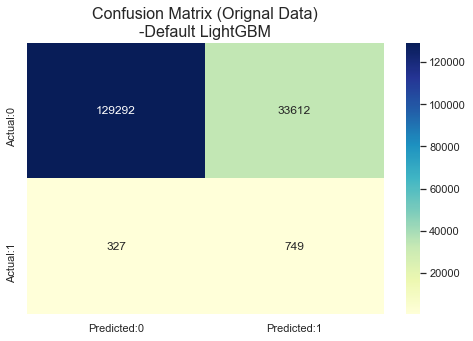

In [18]:
from sklearn.metrics import multilabel_confusion_matrix
sns.set(font_scale = 1)
confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred_bi,
                           labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (Orignal Data)\n-Default LightGBM", fontsize=16)
plt.show()

In [19]:
# importances=dict(zip(gbm.feature_names,gbm.feature_importance()))
# importances

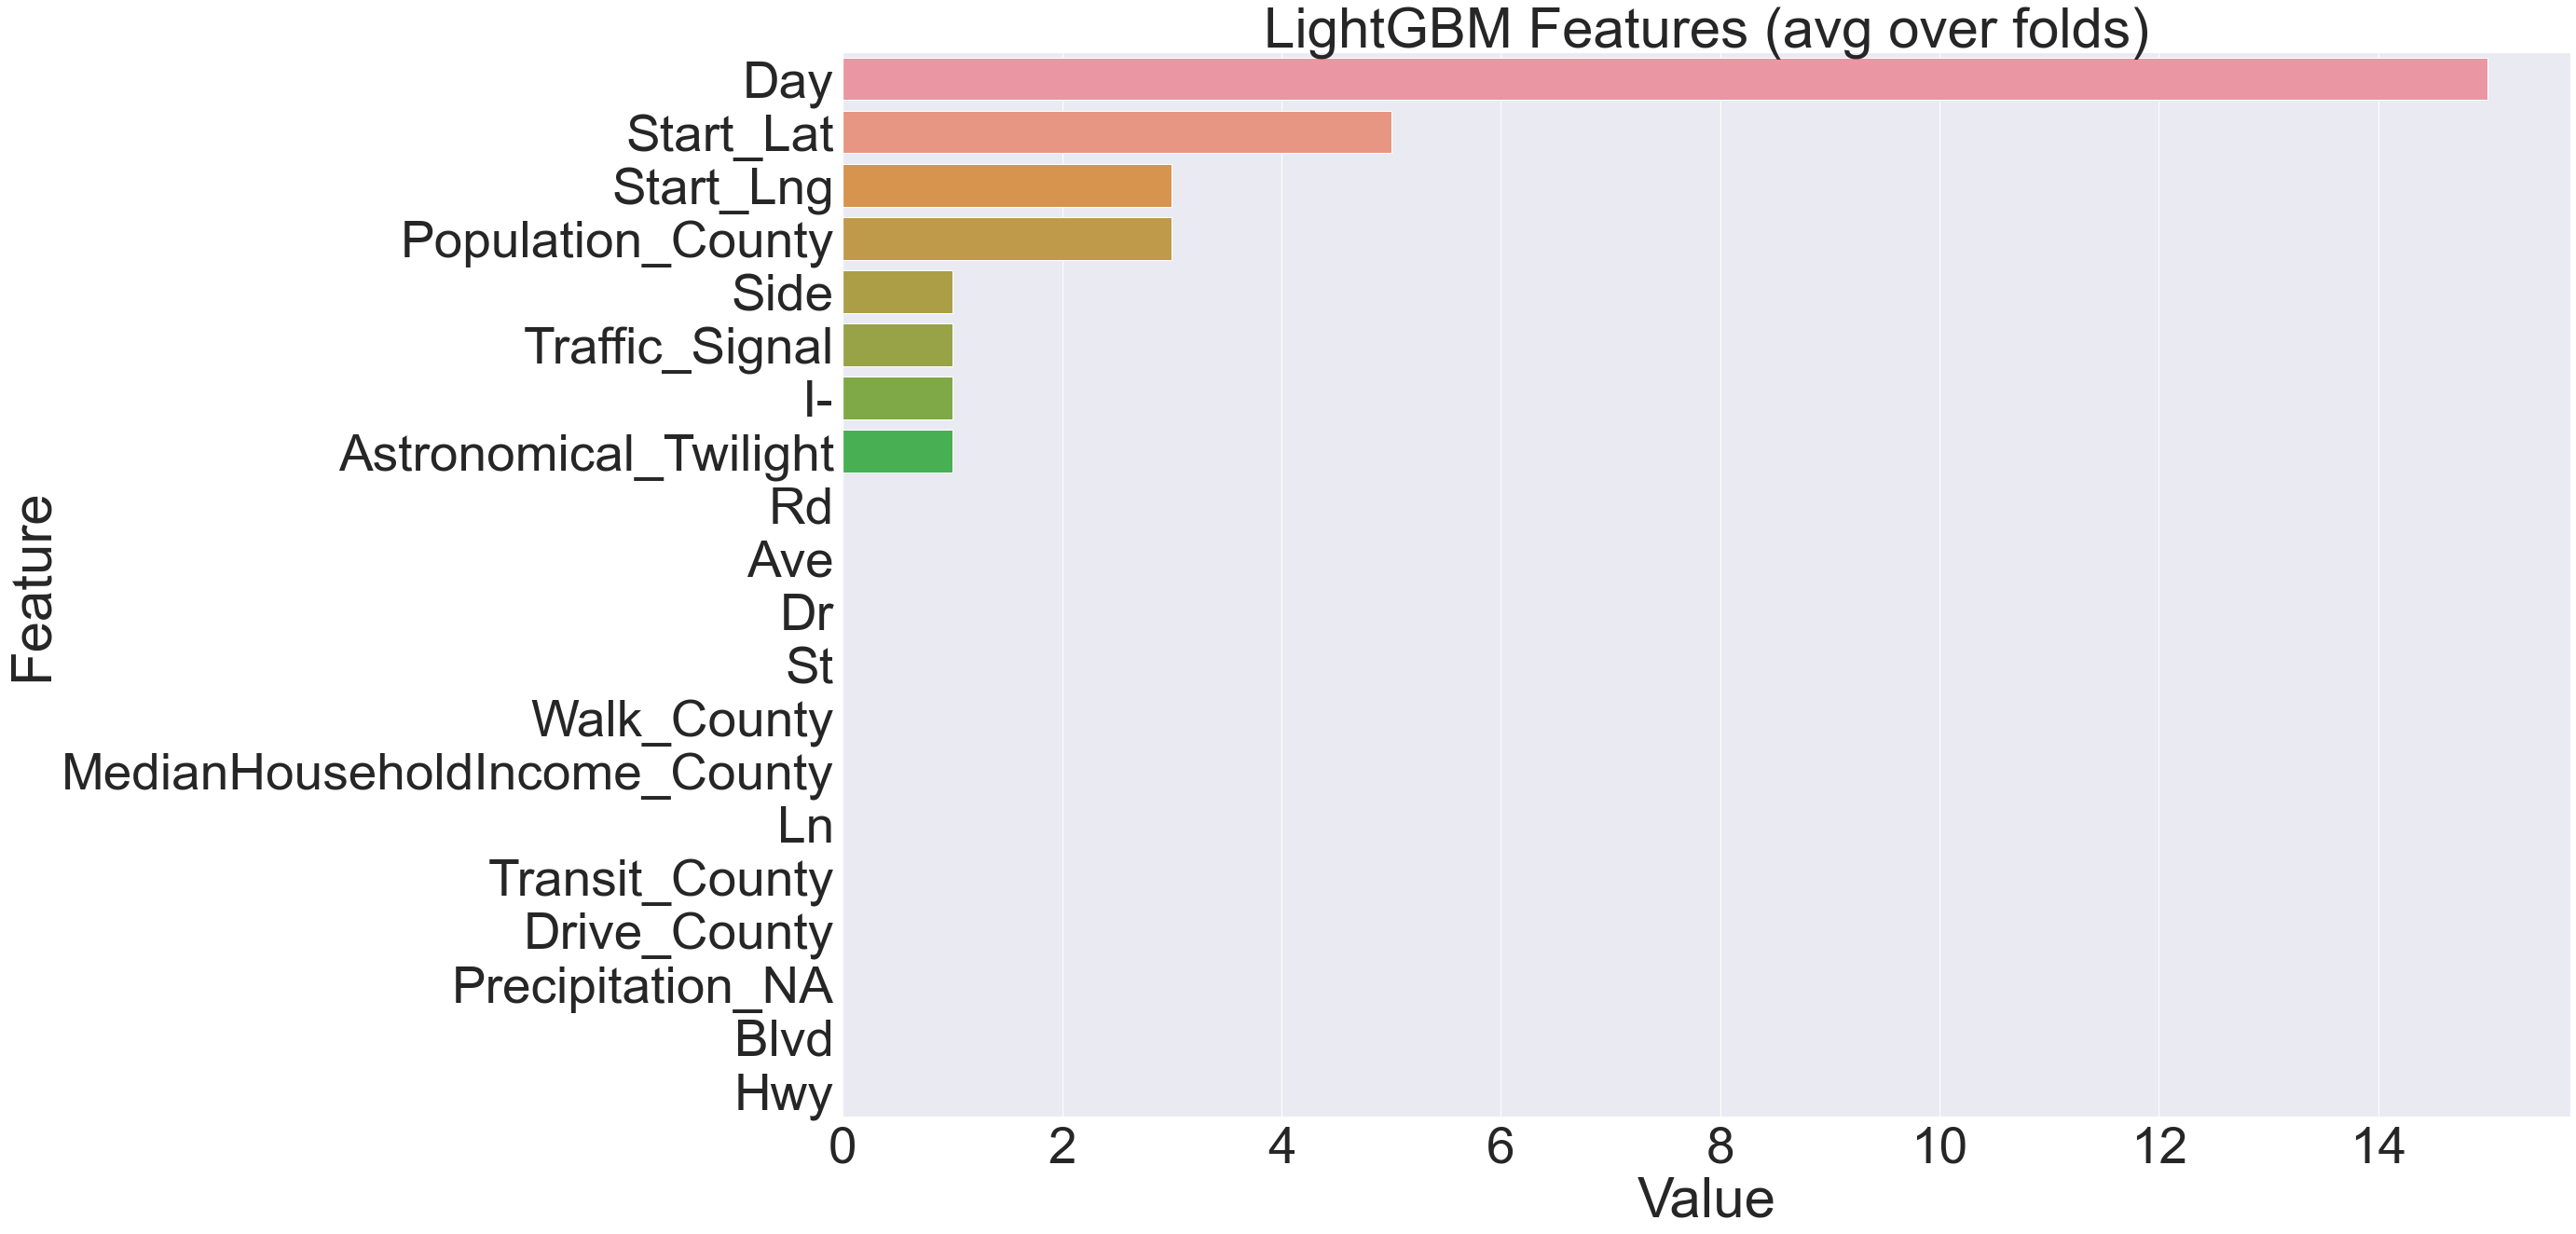

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(gbm, X=X , num = 20)